In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from matplotlib.dates import MonthLocator, DateFormatter

In [3]:
df = pd.read_csv("./data/daily_forex_rates.csv")

In [4]:
df

,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,350.552056,2023-11-22
1,GHS,EUR,Ghanaian Cedi,12.996958,2023-11-22
2,HRK,EUR,Croatian Kuna,7.665963,2023-11-22
3,HNL,EUR,Honduran Lempira,26.867725,2023-11-22
4,HKD,EUR,Hong Kong Dollar,8.487236,2023-11-22
...,...,...,...,...,...
320848,AUD,EUR,Australian Dollar,1.731500,2004-09-01
320849,AUD,EUR,Australian Dollar,1.729600,2004-08-31
320850,JPY,EUR,Japanese Yen,132.850000,2004-08-31
320851,CAD,EUR,Canadian Dollar,1.596700,2004-08-31


In [5]:
df.shape

(320853, 5)

In [6]:
df.isna().sum()

currency         0
base_currency    0
currency_name    0
exchange_rate    0
date             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320853 entries, 0 to 320852
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   currency       320853 non-null  object 
 1   base_currency  320853 non-null  object 
 2   currency_name  320853 non-null  object 
 3   exchange_rate  320853 non-null  float64
 4   date           320853 non-null  object 
dtypes: float64(1), object(4)
memory usage: 12.2+ MB


In [8]:
df["currency_name"].nunique() # 총 나라의 개수

168

In [9]:
df["currency_name"].unique()

array(['Zimbabwean Dollar', 'Ghanaian Cedi', 'Croatian Kuna',
       'Honduran Lempira', 'Hong Kong Dollar', 'Guyanaese Dollar',
       'Guatemalan Quetzal', 'Guinean Franc', 'Gambian Dalasi',
       'Gibraltar Pound', 'Guernsey Pound', 'Laotian Kip',
       'Georgian Lari', 'British Pound Sterling',
       'Falkland Islands Pound', 'Fijian Dollar', 'Euro',
       'Ethiopian Birr', 'Eritrean Nakfa', 'Egyptian Pound',
       'Haitian Gourde', 'Hungarian Forint', 'Indonesian Rupiah',
       'Israeli New Sheqel', 'Cayman Islands Dollar', 'Kuwaiti Dinar',
       'South Korean Won', 'North Korean Won', 'Comorian Franc',
       'Cambodian Riel', 'Kyrgystani Som', 'Kenyan Shilling',
       'Japanese Yen', 'Jordanian Dinar', 'Jamaican Dollar',
       'Jersey Pound', 'Icelandic Króna', 'Iranian Rial', 'Iraqi Dinar',
       'Indian Rupee', 'Manx pound', 'Algerian Dinar', 'Dominican Peso',
       'Danish Krone', 'Brazilian Real', 'Brunei Dollar',
       'Bermudan Dollar', 'Burundian Franc', 'Bahr

In [10]:
df.loc[df["currency_name"].str.contains("korea",case=False )]

,currency,base_currency,currency_name,exchange_rate,date
26,KRW,EUR,South Korean Won,1409.373051,2023-11-22
27,KPW,EUR,North Korean Won,979.857719,2023-11-22
250,KPW,EUR,North Korean Won,982.095220,2023-11-21
251,KRW,EUR,South Korean Won,1414.190302,2023-11-21
369,KRW,EUR,South Korean Won,1408.431201,2023-11-20
...,...,...,...,...,...
300960,KRW,EUR,South Korean Won,1361.300050,2014-11-13
300978,KRW,EUR,South Korean Won,1356.900020,2014-11-12
301058,KRW,EUR,South Korean Won,1365.199950,2014-11-11
301105,KRW,EUR,South Korean Won,1347.099980,2014-11-10


In [11]:
len(df["currency_name"].unique())

168

In [12]:
df

,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,350.552056,2023-11-22
1,GHS,EUR,Ghanaian Cedi,12.996958,2023-11-22
2,HRK,EUR,Croatian Kuna,7.665963,2023-11-22
3,HNL,EUR,Honduran Lempira,26.867725,2023-11-22
4,HKD,EUR,Hong Kong Dollar,8.487236,2023-11-22
...,...,...,...,...,...
320848,AUD,EUR,Australian Dollar,1.731500,2004-09-01
320849,AUD,EUR,Australian Dollar,1.729600,2004-08-31
320850,JPY,EUR,Japanese Yen,132.850000,2004-08-31
320851,CAD,EUR,Canadian Dollar,1.596700,2004-08-31


In [13]:
df.loc[df["currency_name"] == "South Korean Won"]

,currency,base_currency,currency_name,exchange_rate,date
26,KRW,EUR,South Korean Won,1409.373051,2023-11-22
251,KRW,EUR,South Korean Won,1414.190302,2023-11-21
369,KRW,EUR,South Korean Won,1408.431201,2023-11-20
592,KRW,EUR,South Korean Won,1414.257704,2023-11-19
712,KRW,EUR,South Korean Won,1415.184533,2023-11-18
...,...,...,...,...,...
300960,KRW,EUR,South Korean Won,1361.300050,2014-11-13
300978,KRW,EUR,South Korean Won,1356.900020,2014-11-12
301058,KRW,EUR,South Korean Won,1365.199950,2014-11-11
301105,KRW,EUR,South Korean Won,1347.099980,2014-11-10


In [14]:
df.loc[(df["date"].values >= "2022-11-05") & (df["date"].values <= "2023-11-11")]

,currency,base_currency,currency_name,exchange_rate,date
1859,AUD,EUR,Australian Dollar,1.684450,2023-11-10
1860,GHS,EUR,Ghanaian Cedi,12.793676,2023-11-10
1861,ARS,EUR,Argentine Peso,373.839740,2023-11-10
1862,ZWL,EUR,Zimbabwean Dollar,345.010367,2023-11-10
1863,CZK,EUR,Czech Republic Koruna,24.598096,2023-11-10
...,...,...,...,...,...
36251,MDL,EUR,Moldovan Leu,19.298000,2022-11-07
36252,BBD,EUR,Barbadian Dollar,1.928100,2022-11-06
36253,CZK,EUR,Czech Republic Koruna,24.378500,2022-11-06
36254,MXN,EUR,Mexican Peso,19.423500,2022-11-06


In [277]:
df2 = df.loc[(df["currency_name"] == "South Korean Won") & (df["date"].values >= "2022-01-01") & (df["date"].values <= "2023-02-05")].sort_values("date")

In [287]:
df2["date"]

64063   2022-01-03
63852   2022-01-04
63778   2022-01-05
63633   2022-01-06
63505   2022-01-07
           ...    
28640   2023-01-30
28467   2023-01-31
28371   2023-02-01
28228   2023-02-02
28069   2023-02-03
Name: date, Length: 285, dtype: datetime64[ns]

In [212]:
330 // 110, 330 % 110

(3, 0)

In [278]:
df2

,currency,base_currency,currency_name,exchange_rate,date
64063,KRW,EUR,South Korean Won,1347.6,2022-01-03
63852,KRW,EUR,South Korean Won,1350.9,2022-01-04
63778,KRW,EUR,South Korean Won,1354.2,2022-01-05
63633,KRW,EUR,South Korean Won,1360.7,2022-01-06
63505,KRW,EUR,South Korean Won,1360.0,2022-01-07
...,...,...,...,...,...
28640,KRW,EUR,South Korean Won,1335.6,2023-01-30
28467,KRW,EUR,South Korean Won,1338.9,2023-01-31
28371,KRW,EUR,South Korean Won,1341.9,2023-02-01
28228,KRW,EUR,South Korean Won,1335.5,2023-02-02


In [286]:
df2["date"].iloc[ 0 : 130] # 첫번째 날짜부터 109번째까지, 총 110개

64063   2022-01-03
63852   2022-01-04
63778   2022-01-05
63633   2022-01-06
63505   2022-01-07
           ...    
48168   2022-06-27
48044   2022-06-28
47933   2022-06-29
47833   2022-06-30
47708   2022-07-01
Name: date, Length: 130, dtype: datetime64[ns]

In [280]:
df2["date"].iloc[ 130 : 260 ] # 110번째 부터 219번째까지, 총 110개

47517    2022-07-04
47458    2022-07-05
47346    2022-07-06
47206    2022-07-07
47083    2022-07-08
            ...    
31773    2022-12-26
31564    2022-12-27
31442    2022-12-28
31323    2022-12-29
31251    2022-12-30
Name: date, Length: 130, dtype: object

In [281]:
len(df2["date"].iloc[ 260 : ])

25

In [466]:
df2 = df.loc[(df["currency_name"] == "Australian Dollar") & (df["date"].values >= "2023-03-01") & (df["date"].values <= "2023-11-23")].sort_values("date")

In [467]:
len(df2["date"])

197

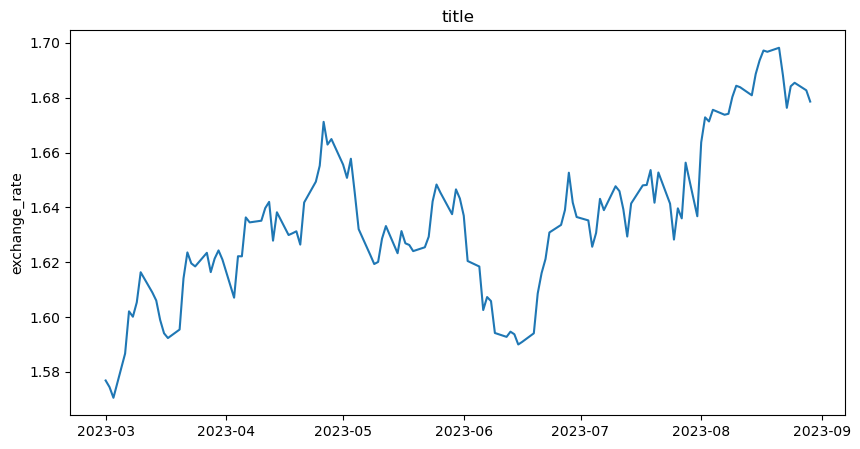

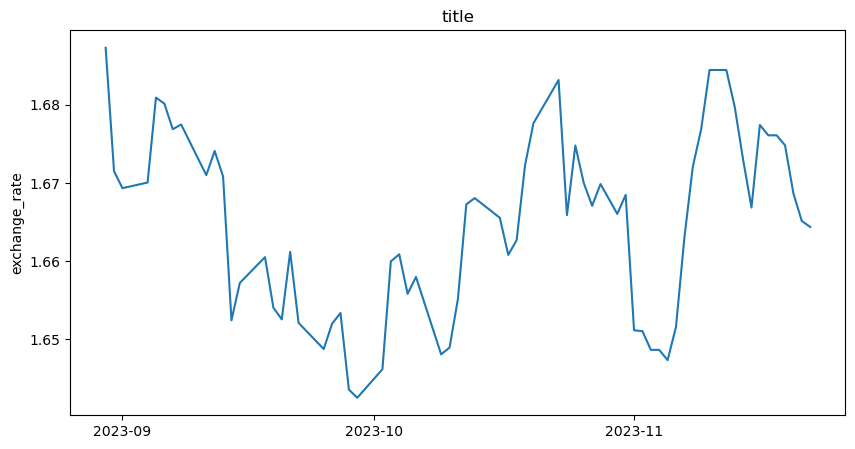

In [468]:
def plot_chart(start_idx , end_idx) :
    fig = plt.figure(figsize=(10,5))
    plt.plot(df2["date"].iloc[start_idx : end_idx] , df2["exchange_rate"].iloc[start_idx : end_idx])
    plt.gca().xaxis.set_major_locator(months)
    plt.gca().xaxis.set_major_formatter(monFmt)
    plt.title("title")
    plt.ylabel("exchange_rate")
    plt.show()

n = len(df2["date"]) # n = 날짜 개수
df2['date'] = pd.to_datetime(df2['date']) # datetime 타입으로 변환
months = MonthLocator() # 1달씩 나오게
monFmt = DateFormatter('%Y-%m') # 표시 형식 포맷

if n % 130 == 0 : # 날짜 개수가 130의 배수일 때 
    count = n // 130 # count = 차트 개수
    
    if count == 1 :
        plot_chart(0, n)
        
    else :
        for i in range(count) : 
            start_idx = i * 130
            end_idx = (i+1) * 130
            plot_chart(start_idx, end_idx)
else :
    count = (n // 130) + 1
        
    if count == 1 : 
        plot_chart(0, n)
        
    else :
        for i in range(count-1) : 
            start_idx = i * 130
            end_idx = (i+1) * 130
            plot_chart(start_idx, end_idx)
 
        start_idx = (count-1) * 130
        end_idx = n
        plot_chart(start_idx, n)

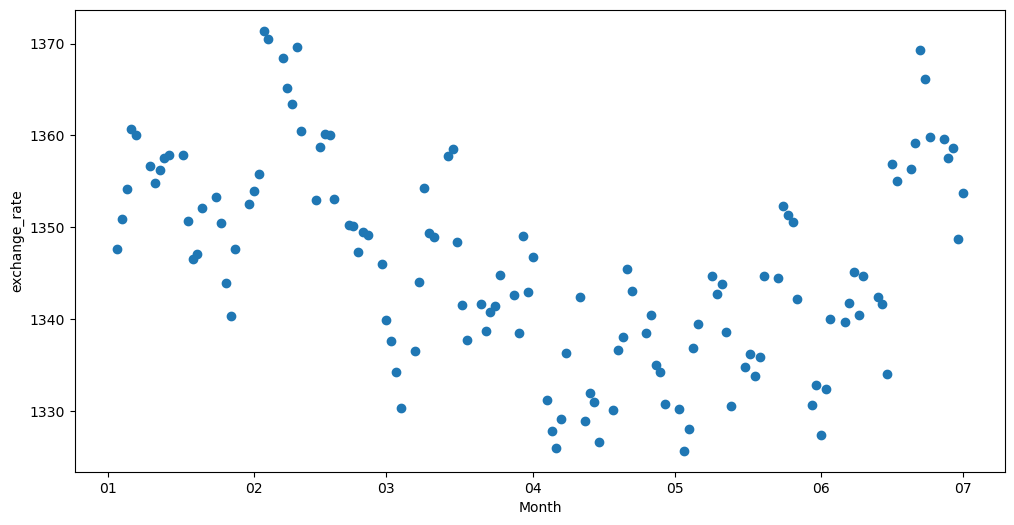

In [253]:
df2['date'] = pd.to_datetime(df2['date'])
fig, ax = plt.subplots(figsize=(12, 6))
months = MonthLocator()  # every month
ax.plot_date(df2["date"], df2["exchange_rate"])
ax.xaxis.set_major_locator(months)
monFmt = DateFormatter('%m')
ax.xaxis.set_major_formatter(monFmt)

plt.xlabel("Month")
plt.ylabel("exchange_rate")
plt.show()

In [ ]:
array1 = df["currency"].unique()

In [ ]:
array2 = df["currency_name"].unique()

In [ ]:
currency_dict = dict(zip(array1, array2))
currency_dict

In [ ]:
df.iloc[ : , [0,2]]

In [ ]:
df

In [ ]:
df.loc[(df["date"] == "2022-11-07") & (df["currency_name"].str.contains("korea",case=False)) ]

In [ ]:
df2.shape[0]

In [ ]:
df2

In [ ]:
half_idx = len(df2) // 2
df2_part1 = df2.iloc[:half_idx, :]
df2_part2 = df2.iloc[half_idx:, :]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sb.lineplot(data=df2_part1, x='date', y='exchange_rate', hue="currency_name")
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')

plt.subplot(1, 2, 2)
sb.lineplot(data=df2_part2, x='date', y='exchange_rate', hue="currency_name")
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')

plt.show()

In [ ]:
df2

In [ ]:
df["currency_name"].value_counts().index

In [ ]:
df.loc[df["currency_name"].str.contains("ddsa", case=False)]

In [ ]:
df["currency_name"].value_counts().index

In [ ]:
df

In [ ]:
df3 = df.groupby("currency_name")[["exchange_rate","date"]].agg([np.min, np.max])

In [ ]:
df3.columns[0]

In [ ]:
df3

In [71]:
df.loc[df["currency_name"] == "South Korean Won"].min()

currency                      KRW
base_currency                 EUR
currency_name    South Korean Won
exchange_rate          1157.80005
date                   2014-11-07
dtype: object

In [ ]:
df.loc[df["currency_name"] == "South Korean Won"].min().values[3:][0]

In [ ]:
df.loc[df["currency_name"] == "South Korean Won"].max().values[3:][1]

In [ ]:
df.loc[df["currency_name"] == "South Korean Won"].max().values[3:][1]

In [25]:
df["currency_name"].unique()

array(['Zimbabwean Dollar', 'Ghanaian Cedi', 'Croatian Kuna',
       'Honduran Lempira', 'Hong Kong Dollar', 'Guyanaese Dollar',
       'Guatemalan Quetzal', 'Guinean Franc', 'Gambian Dalasi',
       'Gibraltar Pound', 'Guernsey Pound', 'Laotian Kip',
       'Georgian Lari', 'British Pound Sterling',
       'Falkland Islands Pound', 'Fijian Dollar', 'Euro',
       'Ethiopian Birr', 'Eritrean Nakfa', 'Egyptian Pound',
       'Haitian Gourde', 'Hungarian Forint', 'Indonesian Rupiah',
       'Israeli New Sheqel', 'Cayman Islands Dollar', 'Kuwaiti Dinar',
       'South Korean Won', 'North Korean Won', 'Comorian Franc',
       'Cambodian Riel', 'Kyrgystani Som', 'Kenyan Shilling',
       'Japanese Yen', 'Jordanian Dinar', 'Jamaican Dollar',
       'Jersey Pound', 'Icelandic Króna', 'Iranian Rial', 'Iraqi Dinar',
       'Indian Rupee', 'Manx pound', 'Algerian Dinar', 'Dominican Peso',
       'Danish Krone', 'Brazilian Real', 'Brunei Dollar',
       'Bermudan Dollar', 'Burundian Franc', 'Bahr

In [55]:
df.loc[df["currency_name"] == "South Korean Won"].describe()

,exchange_rate
count,2364.000000
mean,1319.081806
std,56.858756
min,1157.800050
25%,1280.075000
50%,1322.500000
75%,1352.500000
max,1476.100000


In [83]:
df[df["currency_name"] == "Japanese Yen"].nsmallest(1, "exchange_rate")

,currency,base_currency,currency_name,exchange_rate,date
307004,JPY,EUR,Japanese Yen,94.27,2012-07-24


In [84]:
df[df["currency_name"] == "Japanese Yen"].nlargest(1, "exchange_rate")

,currency,base_currency,currency_name,exchange_rate,date
315270,JPY,EUR,Japanese Yen,169.5,2008-07-21


In [62]:
df[df["currency_name"] == "South Korean Won"].nlargest(1, "exchange_rate").iloc[0,-2]

1476.1

In [72]:
df[df["currency_name"] == "South Korean Won"].nsmallest(1, "exchange_rate").iloc[0,-1]

'2015-04-22'

In [78]:
df[df["currency_name"] == "South Korean Won"].nsmallest(1, "exchange_rate").iloc[0,-2]

1157.80005

In [81]:
df

,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,350.552056,2023-11-22
1,GHS,EUR,Ghanaian Cedi,12.996958,2023-11-22
2,HRK,EUR,Croatian Kuna,7.665963,2023-11-22
3,HNL,EUR,Honduran Lempira,26.867725,2023-11-22
4,HKD,EUR,Hong Kong Dollar,8.487236,2023-11-22
...,...,...,...,...,...
320848,AUD,EUR,Australian Dollar,1.731500,2004-09-01
320849,AUD,EUR,Australian Dollar,1.729600,2004-08-31
320850,JPY,EUR,Japanese Yen,132.850000,2004-08-31
320851,CAD,EUR,Canadian Dollar,1.596700,2004-08-31


In [ ]:
df["currency_name"].str.split()

In [ ]:
def split_cname(currency_name) :
    cname = currency_name.split()
    country = " ".join(cname[:-1])
    return  country , cname[-1]

In [ ]:
df["currency_name"].apply(split_cname).values[74][0] 

In [ ]:
df["currency_name"].apply(split_cname).values[74][1]

In [ ]:
df.loc[df["currency_name"].str.split().str.len() >= 5]

In [ ]:
df

In [ ]:
#plt.hist(data= , x= , rwidth= , bins = )
#-> data = 차트화 시킬 데이터 프레임
#-> x = 차트화 시킬 컬럼명
#-> rwidth = 데이터들의 거리 비율(작을수록 커짐)
#-> bins = 빈 개수 어떻게 할건지

In [ ]:
df2

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df2['date'], df2['exchange_rate'])
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

In [ ]:
plt.figure( figsize= (12, 5) )

plt.subplot(1, 2, 1)

plt.title("speed his. bins 3")
plt.xlabel("Speed")
plt.ylabel("# of Characters")

my_bins = np.arange(5,163,3)
plt.hist(data=df, x="speed", rwidth=0.8, bins=my_bins)

plt.subplot(1, 2, 2)

plt.title("speed his. bins 10")
plt.xlabel("Speed")
plt.ylabel("# of Characters")

my_bins = np.arange(5, 170, 10)
plt.hist(data=df, x="speed", rwidth=0.8, bins=my_bins)
plt.show()

In [ ]:
df2

In [ ]:
df.loc[df["date"] == "2023-01-02"]

In [ ]:
# 사용자 입력을 받는다.
# 날짜 1개, 나라 두개
# 정한 날을 기준으로 1유로당 두 나라의 환율이 나온다.

In [ ]:
df

In [ ]:
df2 = df.loc[(df["currency_name"] == "North Korean Won") & (df["date"] == "2023-11-11")]

In [ ]:
df3 = df.loc[(df["currency_name"] == "South Korean Won") & (df["date"] == "2023-11-1")]

In [ ]:
df2

In [ ]:
df3

In [ ]:
df.loc[(df["currency_name"] == "North Korean Won") & (df["date"] != "2023-11-18")]

In [ ]:
df2["exchange_rate"].values[0]

In [ ]:
df3["exchange_rate"].values[0]

In [ ]:
won = 1335.1
yen = 142.494

won / won , round(yen / 1335.1, 2)

In [ ]:
a = 142.494
b = 1335.1

a / a , round(b / a , 2) 

In [ ]:
from datetime import datetime

In [ ]:
now_time = datetime.now().strftime("%Y-%m-%d")
now_time

In [ ]:
df